Motivation and Goal of study
Due to increasing incidence rate of diabetes and prediabetes, it is a pressing issue in the health care industry to rightly identify the factors that contribute to the occurrence of Diabetes in people, more so, in Women. From secondary research, factors such as BMI, Blood Pressure, Cholesterol and Glucose levels are important factors that cause Diabetes. In Women, Pregnancy seems to be an additional factor. According to the World Health Organization, people with 2-hour post-load plasma glucose levels at least 200 mg/dl (11.1 mmol/l) at any survey examination were diagnosed with Diabetes. To validate the above hypotheses, identify additional risk factors and build tools that can predict the occurrence of Diabetes, particularly in women, the Pima Indians’ Diabetes dataset was chosen.

About the Dataset
The diabetes data containing information about PIMA Indian females, near Phoenix, Arizona has been under continuous study since 1965 due to the high incidence rate of Diabetes in PIMA females. The dataset was originally published by the National Institute of Diabetes and Digestive and Kidney Diseases, consisting of diagnostic measurements pertaining to females of age greater than 20. It contains information of 768 females, of which 268 females were diagnosed with Diabetes. Information available includes 8 variables, such as, Age, Number of Pregnancies, Glucose, Insulin, etc. More detailed description about the variables is listed in the table below. The response variable in the dataset is a binary classifier, Outcome, that indicates if the person was diagnosed with Diabetes or not


Variable Name	       Data Type	          Variable Description

Pregnancies	             integer	          Number of times pregnant

Glucose	                 integer	          Plasma glucose concentration at 2 hours in an oral glucose tolerance test

BloodPressure	         integer	          Diastolic blood pressure

SkinThickness	         integer	          Triceps skin fold thickness

Insulin	                 integer	          2-hour serum insulin (µU/ml)

BMI	                     numeric	          Body Mass Index

DiabetesPedigreeFunction numeric	          Synthesis of the history of Diabetes Mellitus in relatives, generic
                                              relationship of those relatives to the	subject

Age	                     integer	          Age of the individual

Outcome	                 integer	          Occurrence of Diabetes

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Fisrt five rows of data

In [4]:
#reading the data from file and reading first few rows (5)
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Last five entries of the data

In [5]:
# reading the last few rows of data
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Looking for the structure of dataset.

Dataset is having 768 rows and 9 columns.

By looking at the info it can be incurred that no null or missing vaalue are available 
possibly the missing values are replaced by some value

All fields are continuous in nature 

In [6]:
# The data contains numeric data with 768 rows and 9 columns with outcome is the target column
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The describe attribute gives the mean,median,count and five number representation of the data(i.e max,min,25 %tile,50 %tile and 75 %tile)

The min values for BloodPressure,SkinThickness,BMI,Glucose are 0 which is not possible.

It might be that these may be missing value which are change to 0.

The zero min value cholud be addjusted to more meaningful value like mean value for the respective column.

In [8]:
df = data.copy()
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above table it can be seen that after adjustment for the zero value in the datset the mean > than the median for columns Glucose,SkinThickness,Insulin,Age,Pregnancies,PedigreeFunction i.e they are right schewed. 
It gives the presence of outliers in the attributes

In [10]:
(df[df['Outcome']==1]).count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

Total 768 records 268 are having diabetes and 500 are non diabetic

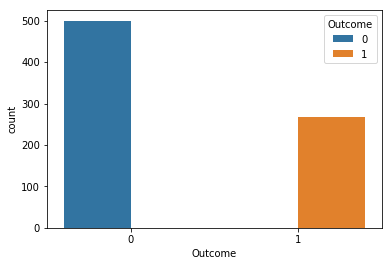

In [11]:
sns.countplot(x=df['Outcome'],data=df,hue='Outcome')

In [14]:
bins = [15,25, 35, 45, 55, 65, 75, 85, 95]
labels = [25,35,45,55,65,75,85,95]
df['Age_bin'] = pd.cut(df['Age'],bins=bins,labels=labels)
bins2 = [20,30,40,50,60,70,80,90,100,110,120,130]
labels = [30,40,50,60,70,80,90,100,110,120,130]
df['BP_bin'] = pd.cut(df['BloodPressure'],bins=bins2,labels=labels)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_bin,BP_bin
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,55,80
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,35,70
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,35,70
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,25,70
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,35,40


Arranging the Age and BloodPressure in bins so as to have a proper visualization

In [15]:
pd.crosstab(df['Outcome'],df['BP_bin'])

BP_bin,30,40,50,60,70,80,90,100,110,120,130
Outcome,,,,,,,,,,,
0,2,1,18,79,166,146,68,15,4,0,1
1,1,1,6,15,86,82,59,10,7,1,0


In [16]:
pd.crosstab(df['Outcome'],df['Age_bin'])

Age_bin,25,35,45,55,65,75,85
Outcome,,,,,,,
0,222,145,73,27,24,8,1
1,45,86,79,41,13,4,0


C:\Users\ttc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ttc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ttc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


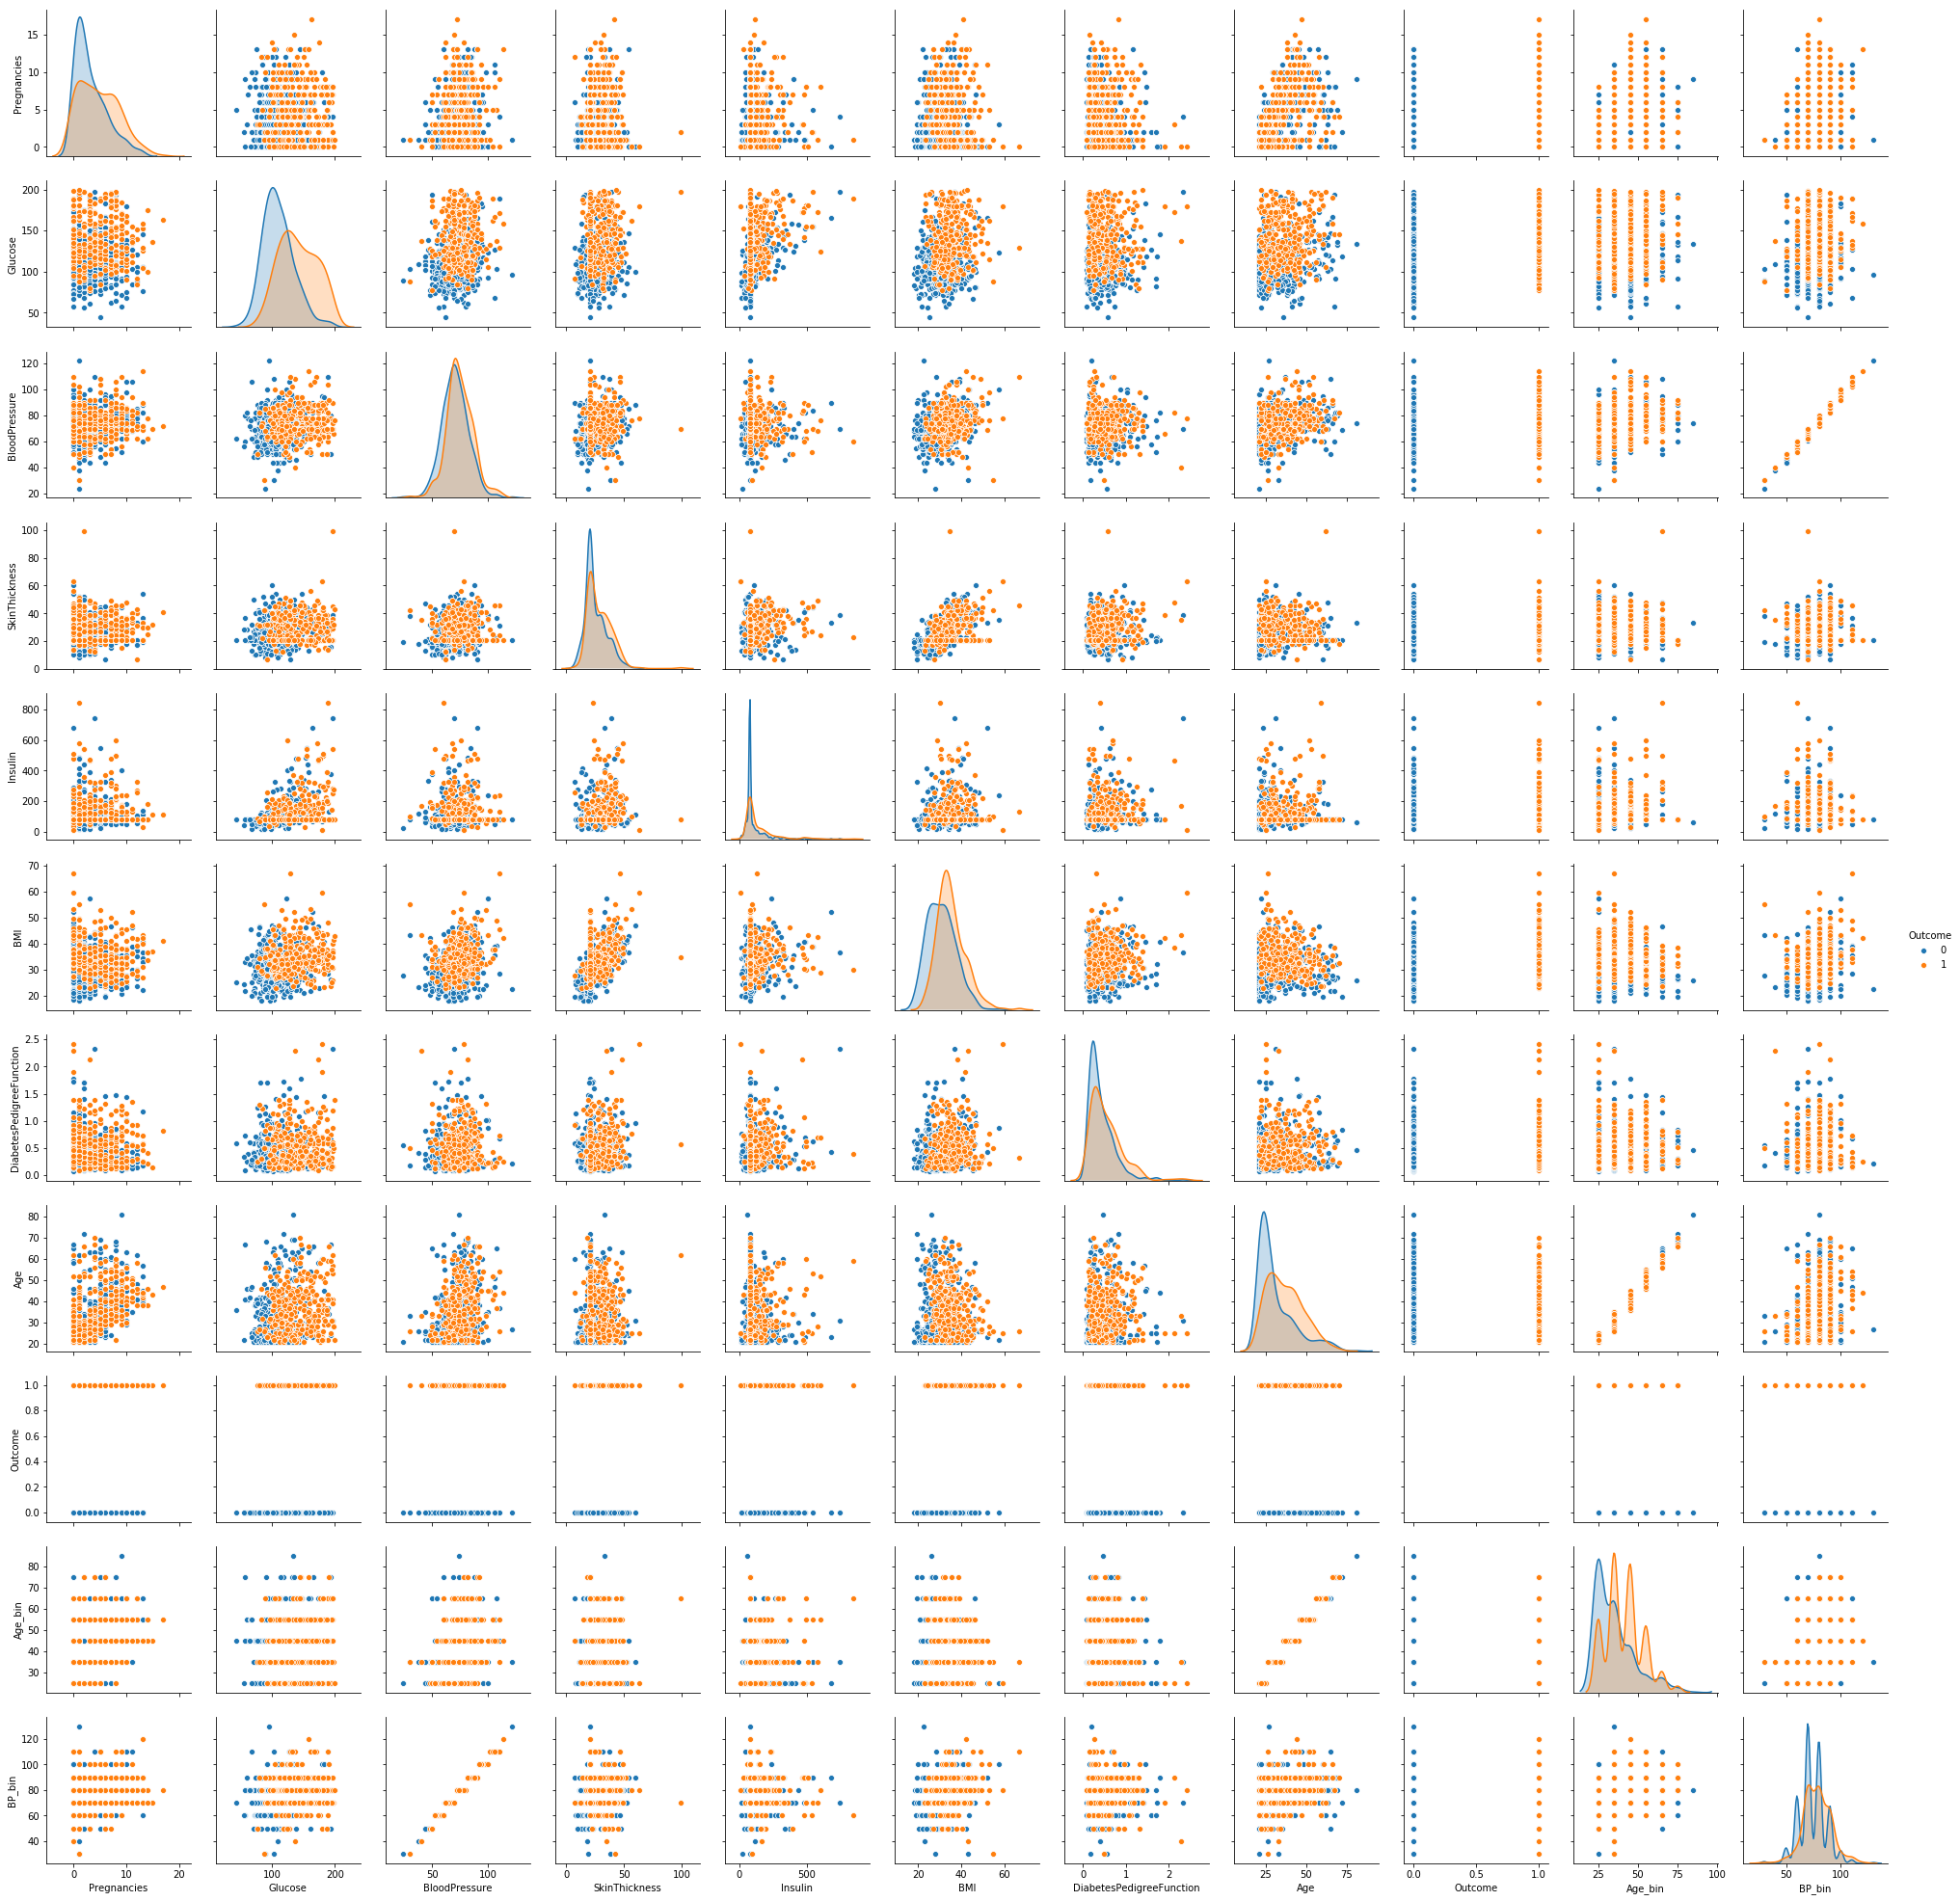

In [47]:
sns.pairplot(df,hue='Outcome')

The above plot shows the relation between different pairs of the column attributes .From the plot it can be seen that there is very little or no correlation amoung the column attrubutes.

The plot between Glucose and outcome shows that after certain value of glucose level the likelyhood of being diabetic is more which is very obvious.

w.r.t Age on y axis the plot shows that 

1. with for greater value of BMI (> 29 ) the risk is more 

2. higher level fo Glucose (> 100 ) the risk is more

3. The patient having BP between 50 and 100 chances are there of being diabetic

4. Low insulin level at all age are susceptible to diabetes

5. Pregnancy count is concentrated more in lower age groups (21 to 50)

6. diabitic positive concentration can be seen at low age with low insulin , high BMI, pregnancy < 10 

Same correlation can be seen in the last plot shown in this notebook file



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8D097A908>,
      dtype=object)

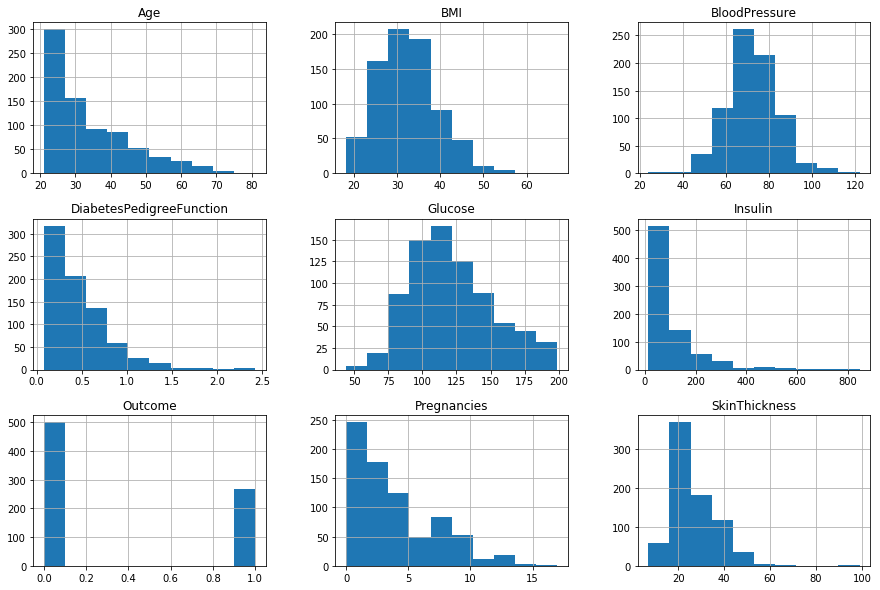

In [18]:
df.hist(figsize=(15,10))

The above plot shaows the frequency distribution for all column 

The BloodPressure value had normal distribution.That means that the 98% of people are within 2 std from the mean.

C:\Users\ttc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


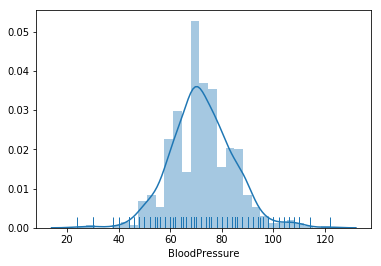

In [19]:
sns.distplot(df['BloodPressure'],rug=True)

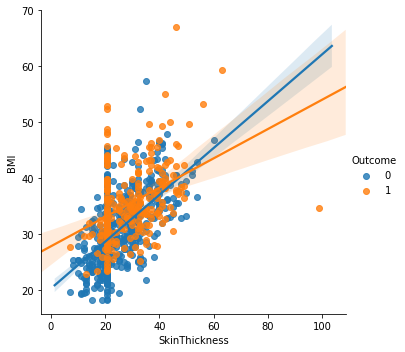

In [20]:
sns.lmplot(x='SkinThickness',y='BMI',data=df,hue='Outcome')

Their is significant correlation between Skin Thickness and BMI

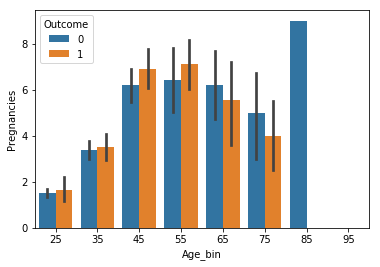

In [21]:
sns.barplot(y='Pregnancies',x='Age_bin',data=df,hue='Outcome')

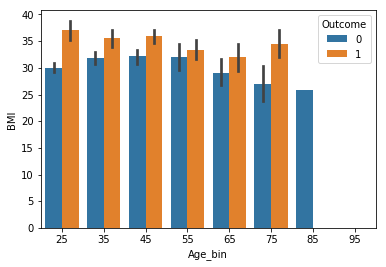

In [22]:
sns.barplot(y='BMI',x='Age_bin',data=df,hue='Outcome')

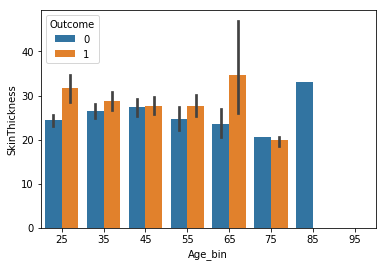

In [23]:
sns.barplot(y='SkinThickness',x='Age_bin',data=df,hue='Outcome')

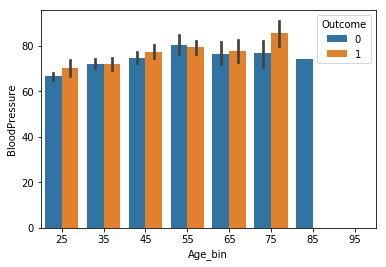

In [24]:
sns.barplot(y='BloodPressure',x='Age_bin',data=df,hue='Outcome')

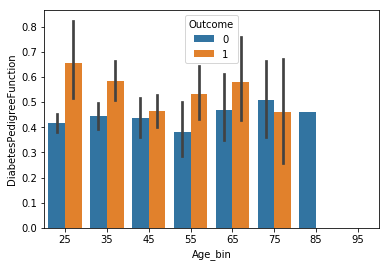

In [25]:
sns.barplot(y='DiabetesPedigreeFunction',x='Age_bin',data=df,hue='Outcome')

From the above  Barplots it can be said that if age is less than 65 and is pregnant and having diabetesPedigreeFunction , BMI within half std +/- from mean than chances of being a Diabetic are high.

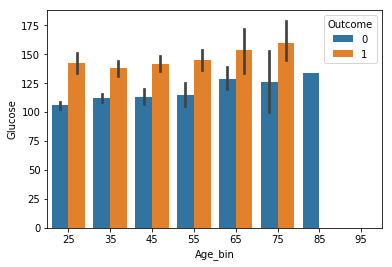

In [26]:
sns.barplot(y='Glucose',x='Age_bin',data=df,hue='Outcome')

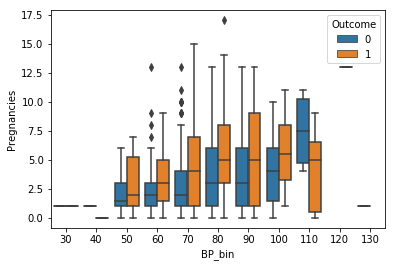

In [27]:
# No of pregnancy higher with BP in 90 bin tends to be diabetic
sns.boxplot(x='BP_bin',y='Pregnancies',data=df,hue='Outcome')


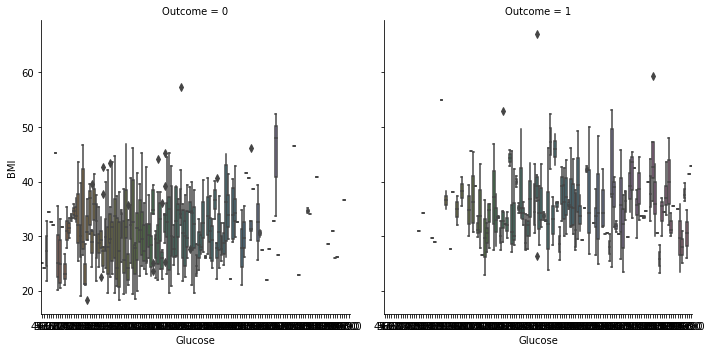

In [28]:
sns.catplot(y='BMI',x='Glucose',col='Outcome',data=df,kind='box')

In [29]:
cor = df.corr()

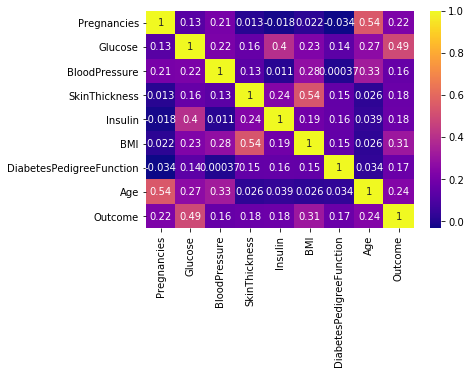

In [30]:
sns.heatmap(cor,cmap='plasma',annot=True)

The heatmap shows the correlation between the attributes:
    Age - Pregnancy , Glucose - Outcome , BMI - SkinThickness , Insulin - Glucose , BMI - BloodPressure shows some correlation between them

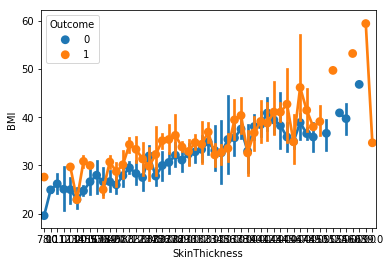

In [31]:
sns.pointplot(y='BMI',x='SkinThickness',data=df,hue='Outcome')

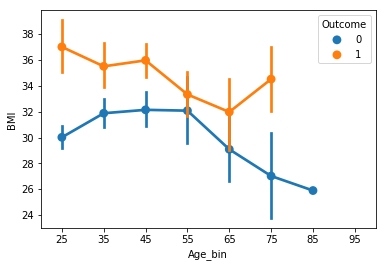

In [32]:
sns.pointplot(y='BMI',x='Age_bin',data=df,hue='Outcome')

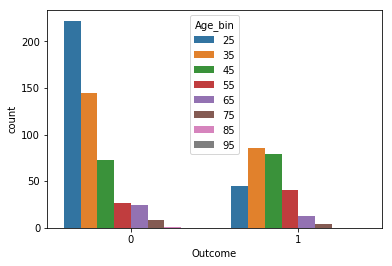

In [33]:
sns.countplot(x='Outcome',data=df,hue='Age_bin')

Again It can be said that women in age group of 25 to 45 having high BP, are Pregnant and having high BMI tends to be diabetic as compare the the womens in same age group but with low BP,BMI and are not pregnant 

In [34]:
# Simple Linear Regression


#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = df['Outcome']
x = df[['BMI','Glucose','Pregnancies','Age']]

# Train the model using the training sets
regr.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
regr.coef_

array([0.01473097, 0.00647873, 0.01964121, 0.00191157])

In [36]:
regr.intercept_

-1.056479975248166

In [ ]:
#y = m1x1 + m2x2 + m3x3 + m4x4 + c


#Example

#   -1.05 + .015*BMI + .0065*Glucose + .02*Pregnancies + .002*Age =  Outcome

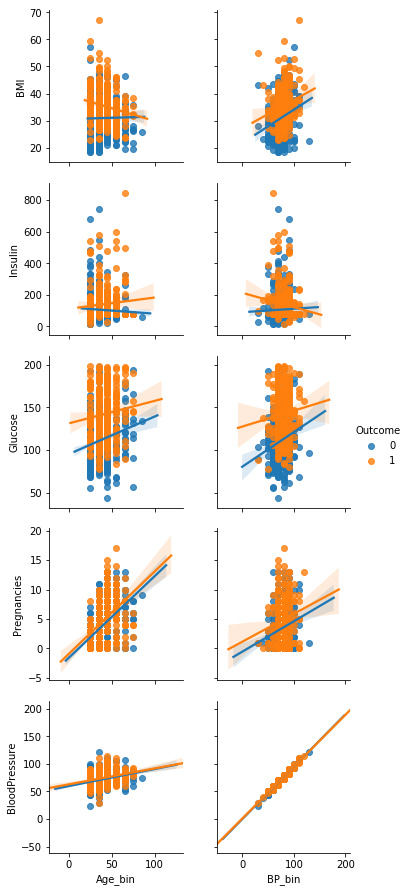

In [48]:
a = sns.pairplot(x_vars=['Age_bin','BP_bin'],y_vars=['BMI','Insulin','Glucose','Pregnancies','BloodPressure'],data=df,hue='Outcome',kind='reg')